In [1]:
import pandas as pd
import os
import datetime
import preprocessing_module as ppm
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import pickle as pkl

In [2]:
katse_nr = 8
order = 2
dx = 5

path = '/Users/svennomm/kohalikTree/Data/AIRSCS/wave/data_v2/'
winx=384

In [3]:
path = path + "katse_0" + str(katse_nr) + "/"
initial_data_file_1 = path + 'sarspec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_co_clean.csv'
initial_data_file_2 = path + 'sarspec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_cro_clean.csv'
target_data_file = path + 'wavespec_hgh_order_' + str(order) + '_winx_' + str(winx) + '_clean.csv'

In [4]:
initial_data_1 = pd.read_csv(initial_data_file_1, sep=',')
initial_data_2 = pd.read_csv(initial_data_file_2, sep=',')
target_data = pd.read_csv(target_data_file, sep=',')

In [5]:
input_data_1_train, input_data_2_train, target_data_train, input_data_1_test, input_data_2_test, target_data_test,\
        test_data_indexes = ppm.time_based_splitter(initial_data_1, initial_data_2, target_data)

In [6]:
input_data_1_train, input_data_2_train, target_data_train = ppm.initial_formatting_old_data(input_data_1_train, input_data_2_train, target_data_train)
input_data_1_test, input_data_2_test, target_data_test = ppm.initial_formatting_old_data(input_data_1_test,input_data_2_test, target_data_test)

Aloha! Performing initial formatting
Initial  formatting has been completed!
Aloha! Performing initial formatting
Initial  formatting has been completed!


In [7]:
device = torch.device('mps')
input_tensor_1_train = torch.tensor(input_data_1_train.values).float()
input_tensor_2_train = torch.tensor(input_data_2_train.values).float()
target_tensor_train = torch.tensor(target_data_train.values).float()

input_tensor_1_test = torch.tensor(input_data_1_test.values).float()
input_tensor_2_test = torch.tensor(input_data_2_test.values).float()
target_tensor_test = torch.tensor(target_data_test.values).float()

In [8]:
print(torch.Tensor.size(input_tensor_1_train),torch.Tensor.size(input_tensor_2_train), torch.Tensor.size(target_tensor_train))
print(torch.Tensor.size(input_tensor_1_test),torch.Tensor.size(input_tensor_2_test), torch.Tensor.size(target_tensor_test))

torch.Size([7952, 70]) torch.Size([7952, 70]) torch.Size([7952, 70])
torch.Size([73, 70]) torch.Size([73, 70]) torch.Size([73, 70])


In [9]:
input_tensor_train_log_div_norm = ppm.combine_polarisations_log_div_norm(input_tensor_1_train, input_tensor_2_train)
input_tensor_train_div_norm = ppm.combine_polarisations_div_norm(input_tensor_1_train, input_tensor_2_train)
input_tensor_train_div = ppm.combine_polarisations_div(input_tensor_1_train, input_tensor_2_train)

input_tensor_test_log_div_norm = ppm.combine_polarisations_log_div_norm(input_tensor_1_test, input_tensor_2_test)
input_tensor_test_div_norm = ppm.combine_polarisations_div_norm(input_tensor_1_test, input_tensor_2_test)
input_tensor_test_div = ppm.combine_polarisations_div(input_tensor_1_test, input_tensor_2_test)

In [10]:
print(torch.Tensor.size(input_tensor_train_div),torch.Tensor.size(input_tensor_train_div_norm), torch.Tensor.size(input_tensor_train_log_div_norm))
print(torch.Tensor.size(input_tensor_test_div),torch.Tensor.size(input_tensor_test_div_norm), torch.Tensor.size(input_tensor_test_log_div_norm))

torch.Size([7952, 70]) torch.Size([7952, 70]) torch.Size([7952, 70])
torch.Size([73, 70]) torch.Size([73, 70]) torch.Size([73, 70])


In [11]:
input_data_train_log_div_norm = input_tensor_train_log_div_norm.detach().cpu().numpy()
input_data_train_div_norm = input_tensor_train_div_norm.detach().cpu().numpy()
input_data_train_div = input_tensor_train_div.detach().cpu().numpy()
target_data_train = target_tensor_train.detach().cpu().numpy()

input_data_test_log_div_norm = input_tensor_test_log_div_norm.detach().cpu().numpy()
input_data_test_div_norm = input_tensor_test_div_norm.detach().cpu().numpy()
input_data_test_div = input_tensor_test_div.detach().cpu().numpy()
target_data_test = target_tensor_test.detach().cpu().numpy()

input_data_train_log_div_norm_trunc = ppm.cut_tail(input_data_train_log_div_norm, 60)
input_data_train_div_norm_trunc = ppm.cut_tail(input_data_train_div_norm, 60)
input_data_train_div_trunc = ppm.cut_tail(input_data_train_div, 60)
target_data_train_trunc = ppm.cut_tail(target_data_train, 60)

input_data_test_log_div_norm_trunc = ppm.cut_tail(input_data_test_log_div_norm, 60)
input_data_test_div_norm_trunc = ppm.cut_tail(input_data_test_div_norm, 60)
input_data_test_div_trunc = ppm.cut_tail(input_data_test_div, 60)
target_data_test_trunc = ppm.cut_tail(target_data_test, 60)

In [12]:
print(type(input_data_train_div), input_data_train_div.shape)
print(type(input_data_train_div_norm), input_data_train_div_norm.shape)
print(type(input_data_train_log_div_norm), input_data_train_log_div_norm.shape)
print(type(target_data_train), target_data_train.shape)

print(type(input_data_test_div), input_data_test_div.shape)
print(type(input_data_test_div_norm), input_data_test_div_norm.shape)
print(type(input_data_test_log_div_norm), input_data_test_log_div_norm.shape)
print(type(target_data_test), target_data_test.shape)

<class 'numpy.ndarray'> (7952, 70)
<class 'numpy.ndarray'> (7952, 70)
<class 'numpy.ndarray'> (7952, 70)
<class 'numpy.ndarray'> (7952, 70)
<class 'numpy.ndarray'> (73, 70)
<class 'numpy.ndarray'> (73, 70)
<class 'numpy.ndarray'> (73, 70)
<class 'numpy.ndarray'> (73, 70)


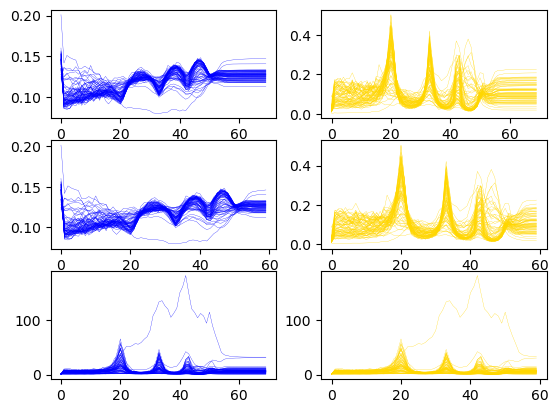

In [13]:
n = len(input_data_test_log_div_norm)
fig_1 = plt.figure()
ax_1_1 = fig_1.add_subplot(3, 2, 1)
ax_1_2 = fig_1.add_subplot(3, 2, 2)
ax_1_3 = fig_1.add_subplot(3, 2, 3)
ax_1_4 = fig_1.add_subplot(3, 2, 4)
ax_1_5 = fig_1.add_subplot(3, 2, 5)
ax_1_6 = fig_1.add_subplot(3, 2, 6)

for i in range(0, n):
    #if i % 100 != 0:
    ax_1_1.plot(input_data_test_log_div_norm[i, :], color='blue', linewidth=0.2)
    ax_1_2.plot(input_data_test_div_norm[i, :], color='gold', linewidth=0.2)
    ax_1_3.plot(input_data_test_log_div_norm_trunc[i, :], color='blue', linewidth=0.2)
    ax_1_4.plot(input_data_test_div_norm_trunc[i, :], color='gold', linewidth=0.2)
    ax_1_5.plot(input_data_test_div[i, :], color='blue', linewidth=0.2)
    ax_1_6.plot(input_data_test_div_trunc[i, :], color='gold', linewidth=0.2)


plt.show()


In [14]:
#generate file name
#path = '/Users/svennomm/kohalikTree/Data/AIRSCS/wave/data_v2/'
#path_1 = path + 'alternative_processing_2/katse_test/'
path = '/Users/svennomm/kohalikTree/Data/AIRSCS/wave/data_v2/'
path_1 = path + 'alternative_processing/' + "katse_0" + str(katse_nr) + '/'
fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_ldn' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_ldn' + '_test.pkl'

data = [input_data_train_log_div_norm, target_data_train]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_log_div_norm, target_data_test, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)


fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dn' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dn' + '_test.pkl'

data = [input_data_train_div_norm, target_data_train]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_div_norm, target_data_test, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)


fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_ldnt' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_ldnt' + '_test.pkl'

data = [input_data_train_log_div_norm_trunc, target_data_train_trunc]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_log_div_norm_trunc, target_data_test_trunc, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)

fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dnt' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dnt' + '_test.pkl'

data = [input_data_train_div_norm_trunc, target_data_train_trunc]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_div_norm_trunc, target_data_test_trunc, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)

fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_d' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_d' + '_test.pkl'

data = [input_data_train_div, target_data_train]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_div, target_data_test, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)

fname_train = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dt' + '_train.pkl'
fname_test = path_1 + "katse_0" + str(katse_nr) + '_winx_' + str(winx) + '_dt' + '_test.pkl'

data = [input_data_train_div_trunc, target_data_train_trunc]
with open(fname_train, 'wb') as f:
    pkl.dump(data, f)

data = [input_data_test_div_trunc, target_data_test_trunc, test_data_indexes]
with open(fname_test, 'wb') as f:
    pkl.dump(data, f)

In [28]:
print()